In [2]:
%load_ext autoreload
%autoreload 2

In [34]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import auc

from src.metrics import dice_coef, dice_norm_metric, soft_dice_norm_metric, rc_curve
from src.confidence import (ExpectedEntropy, ExpectedEntropy_With_If,
                            MeanMaxConfidence, MeanMaxConfidence_With_If,
                            PredChangeDSC, PredChangeDSC_With_If,
                            DSCIntegralOverThreshold, SoftDice)
from src.utils import plot_baselines, plot_rc_curve, plot_rc_curves

In [5]:
data = np.load('data/pred/isic_unext_test.npz')
y = data['y']
y_hat = data['y_hat']

y.shape, y_hat.shape

((1000, 1, 512, 512), (1000, 1, 512, 512))

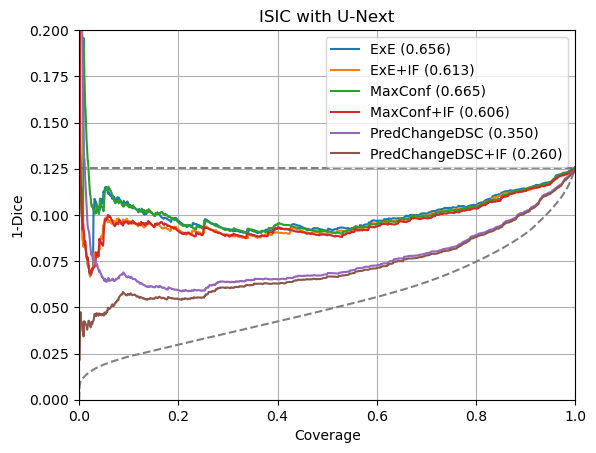

In [33]:
fig, ax = plt.subplots()

dice_scores = np.stack([dice_coef(y_hat[i], y[i]) for i in range(len(y))])
dice_errors = 1 - dice_scores

confidence_metrics = {
    'ExE': ExpectedEntropy(),
    'ExE+IF': ExpectedEntropy_With_If(),
    'MaxConf': MeanMaxConfidence(),
    'MaxConf+IF': MeanMaxConfidence_With_If(),
    'PredChangeDSC': PredChangeDSC(),
    'PredChangeDSC+IF': PredChangeDSC_With_If(),
}
confidences = {name: [confidence_metric(y_hat_i) for y_hat_i in y_hat]
               for name, confidence_metric in confidence_metrics.items()}

ax = plot_rc_curves(confidences, dice_errors, ax)

ax.set_ylim(0,0.2)

ax.set_title('ISIC with U-Next')
ax.set_ylabel('1-Dice')
ax.set_xlabel('Coverage')
fig.show()

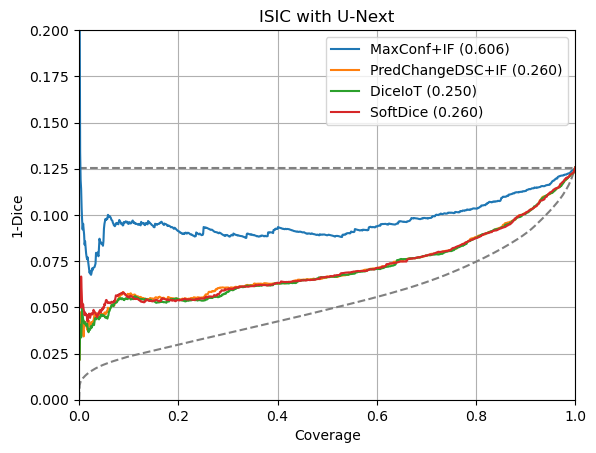

In [36]:
fig, ax = plt.subplots()

dice_scores = np.stack([dice_coef(y_hat[i], y[i]) for i in range(len(y))])
dice_errors = 1 - dice_scores

confidence_metrics = {
    'MaxConf+IF': MeanMaxConfidence_With_If(),
    'PredChangeDSC+IF': PredChangeDSC_With_If(),
    'DiceIoT': DSCIntegralOverThreshold(),
    'SoftDice': SoftDice(),
}
confidences = {name: [confidence_metric(y_hat_i) for y_hat_i in y_hat]
               for name, confidence_metric in confidence_metrics.items()}

ax = plot_rc_curves(confidences, dice_errors, ax)

ax.set_ylim(0,0.2)

ax.set_title('ISIC with U-Next')
ax.set_ylabel('1-Dice')
ax.set_xlabel('Coverage')
fig.show()